In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn:.2f}")


KNN Model Accuracy: 1.00


In [5]:
y_pred = model.predict(X_test) 

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
from sklearn.datasets import make_blobs
import pandas as pd

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_


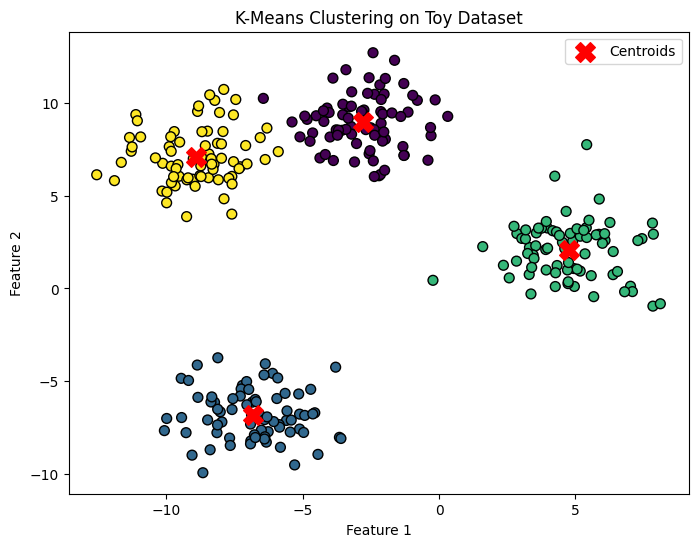

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering on Toy Dataset")
plt.legend()
plt.show()


In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1, 11)
inertia_values = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


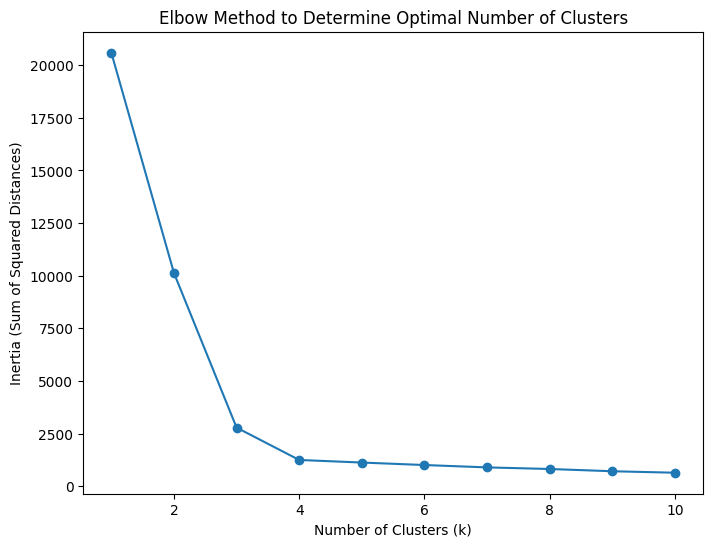

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()


In [15]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4) 
labels_hierarchical = agglomerative.fit_predict(X)


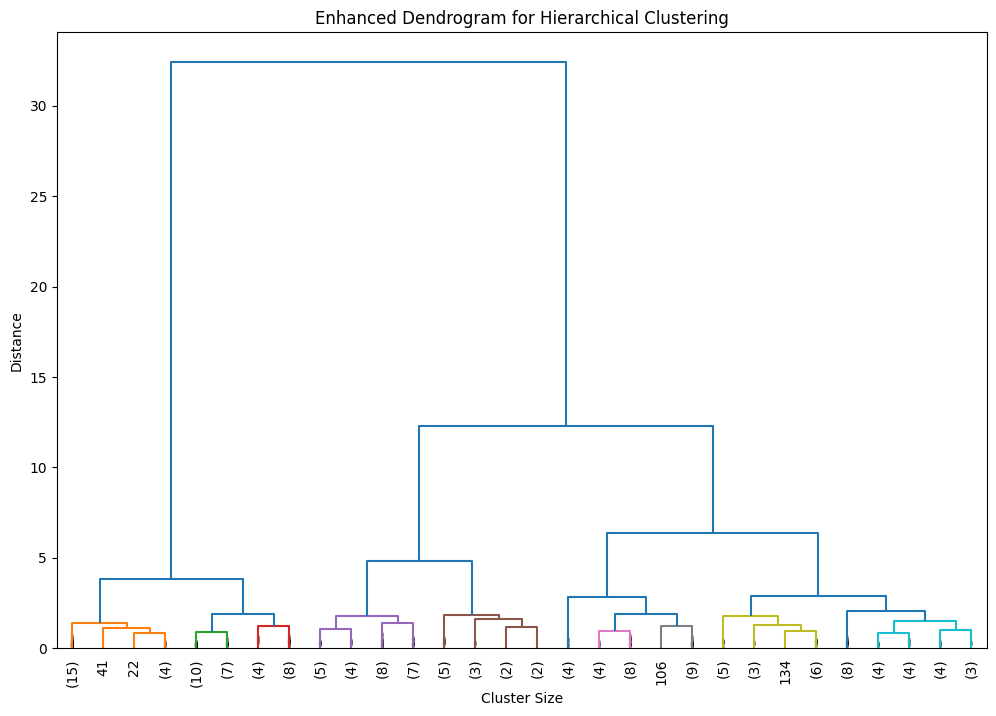

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(X, method='ward')  

plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30,  # Show only the last 30 merged clusters
    leaf_rotation=90.,  # Rotate labels to make them vertical
    leaf_font_size=10.,  # Font size for better readability
    show_contracted=True,  # Show summary clusters to simplify large dendrograms
    color_threshold=linkage_matrix[-10, 2]  # Cut-off threshold for colors
)
plt.title("Enhanced Dendrogram for Hierarchical Clustering")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.grid(False)  # Remove grid for cleaner look
plt.show()


In [18]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Initialize and apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

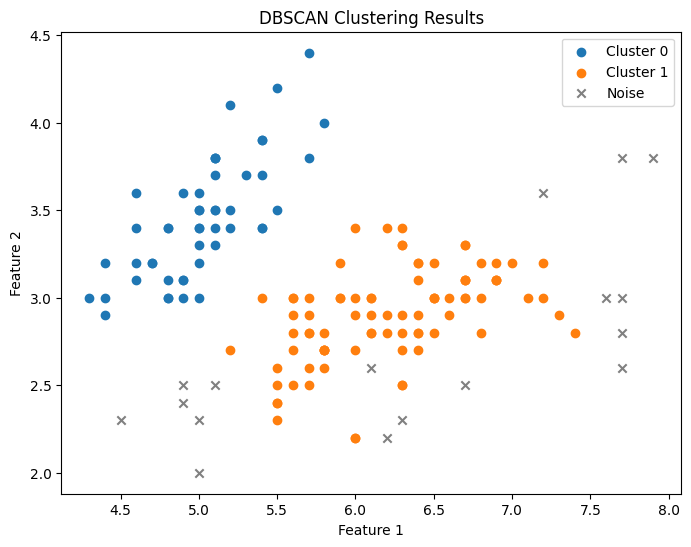

In [19]:
# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels_dbscan)
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X[labels_dbscan == label, 0], X[labels_dbscan == label, 1], 
                    color="grey", marker="x", label="Noise")
    else:
        plt.scatter(X[labels_dbscan == label, 0], X[labels_dbscan == label, 1], 
                    marker="o", label=f"Cluster {label}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Results")
plt.legend()
plt.show()
